<a href="https://colab.research.google.com/github/Tharunopi/PyTorch/blob/main/PyTorch_workflow_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A PyTorch workflow
1.  Turn data into tensor
2.  Build or pick a pretrained model


```
2.1. Pick a loss function and optimizer
2.2. Build a training loop
```


3.   Fit the model to the data and make prediction
4.  Evalvate the model
5.   Improve through experimentation
6.Save and reload your trained model






In [37]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.device(device)

device(type='cpu')

# **Creating dataset by using linear regression formula**

In [3]:
start, end, steps = 0, 1, 0.02
X = torch.arange(start, end, steps).unsqueeze(dim=1)
X[:5]

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800]])

In [4]:
weight = 0.7
bias = 0.3
y = weight * X + bias
y[:5]

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560]])

# **Splitting the data**

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
print(len(X_train), len(y_test))

40 10


# **Visualizing the data**

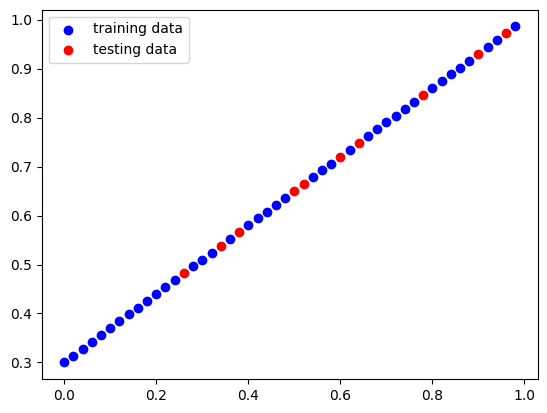

In [8]:
def visualize(train_x=X_train, test_x=X_test, train_y=y_train, test_y=y_test, prediction=None):
  plt.scatter(train_x, train_y, c='b', label='training data')
  plt.scatter(test_x, test_y, c='r', label='testing data')
  if prediction is not None:
    plt.scatter(test_x, prediction, c='g', label='prediction data')
  plt.legend()
  plt.show()

visualize()

# **Building PyTorch model**

In [9]:
#creating a linear regression model
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  # creating a forward method for computation
  def forward(self, x:torch.tensor) -> torch.tensor:
    return self.weights * x + self.bias

In [10]:
#checking contents of our model
# torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([1.0483], requires_grad=True),
 Parameter containing:
 tensor([2.2607], requires_grad=True)]

In [11]:
model_0.state_dict()

OrderedDict([('weights', tensor([1.0483])), ('bias', tensor([2.2607]))])

In [12]:
with torch.inference_mode():
  y_pred = model_0(X_test)

print(y_pred)

tensor([[2.5332],
        [3.0784],
        [2.8897],
        [3.2041],
        [2.6171],
        [3.2670],
        [2.8058],
        [2.7848],
        [2.9316],
        [2.6590]])


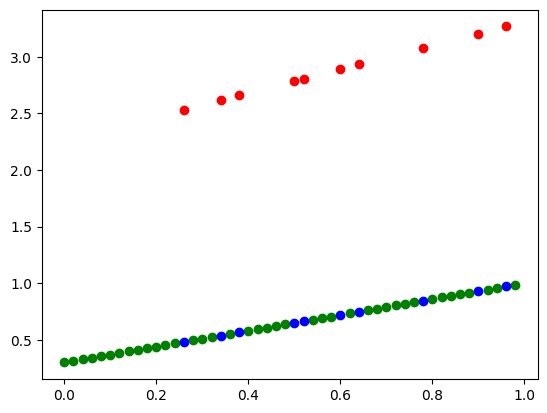

In [13]:
plt.scatter(X_train, y_train, c='g')
plt.scatter(X_test, y_test, c='b')
plt.scatter(X_test, y_pred, c='r')
plt.show()

In [14]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(model_0.parameters(), lr = 0.01)

# **Training loop**

0. Loop through the data
1. Forward pass to make predictions on data
2. Backward pass to move backwards to model to calculate gradients of the model to calculate loss.
3. use Optimizers to adjust the model parameters to reduce the loss.

In [15]:
# 0. Loop through throught the data
epochs = 300

epoch_count, train_loss_value, test_loss_value = [], [], []

for i in range(epochs):

  model_0.train() #turns on gradient tracking

  y_pred = model_0(X_train)

  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad() # sets the gradient to none

  loss.backward()

  optimizer.step() # over time the gradients may accumulate so we have to set them to None

  # print("_______________________________________________________________________")

  # print(f'predicted weight :{model_0.state_dict()["weights"][0]} actual: {weight}')
  # print(f'predicted bias :{model_0.state_dict()["bias"][0]} actual: {bias}')

  model_0.eval() #turns off gradient tracking
  with torch.inference_mode():
    test_pred = model_0(X_test)

    test_loss = loss_fn(test_pred, y_test)

  if i % 10 == 0:
    epoch_count.append(i)
    train_loss_value.append(loss)
    test_loss_value.append(test_loss)
    print(f'Epoch: {i} | loss: {loss} | test_loss: {test_loss}')

Epoch: 0 | loss: 2.122804880142212 | test_loss: 2.1527366638183594
Epoch: 10 | loss: 2.001136064529419 | test_loss: 2.0253653526306152
Epoch: 20 | loss: 1.879467248916626 | test_loss: 1.897994041442871
Epoch: 30 | loss: 1.757798433303833 | test_loss: 1.7706228494644165
Epoch: 40 | loss: 1.636129379272461 | test_loss: 1.6432514190673828
Epoch: 50 | loss: 1.5144603252410889 | test_loss: 1.5158801078796387
Epoch: 60 | loss: 1.3927913904190063 | test_loss: 1.3885087966918945
Epoch: 70 | loss: 1.2711225748062134 | test_loss: 1.2611374855041504
Epoch: 80 | loss: 1.1494536399841309 | test_loss: 1.1337660551071167
Epoch: 90 | loss: 1.0277847051620483 | test_loss: 1.006394863128662
Epoch: 100 | loss: 0.906115710735321 | test_loss: 0.879023551940918
Epoch: 110 | loss: 0.7844468355178833 | test_loss: 0.7516522407531738
Epoch: 120 | loss: 0.6627777814865112 | test_loss: 0.6242808699607849
Epoch: 130 | loss: 0.5411087870597839 | test_loss: 0.4969095289707184
Epoch: 140 | loss: 0.4194398820400238 | 

In [16]:
train_loss_value = [i.detach().cpu().numpy() for i in train_loss_value]
test_loss_value = [i.detach().cpu().numpy() for i in test_loss_value]

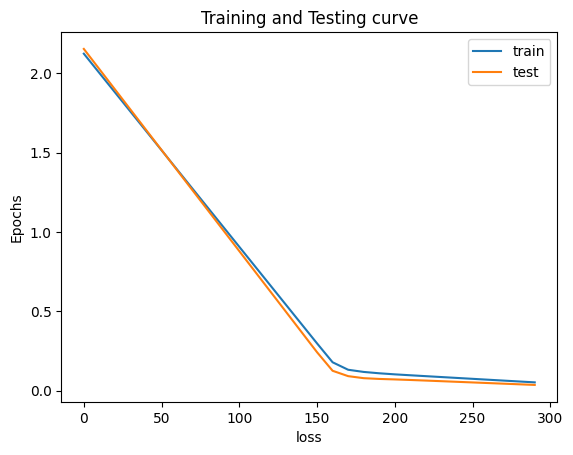

In [17]:
plt.plot(epoch_count, train_loss_value, label="train")
plt.plot(epoch_count, test_loss_value, label="test")
plt.xlabel("loss")
plt.ylabel("Epochs")
plt.title("Training and Testing curve")
plt.legend()

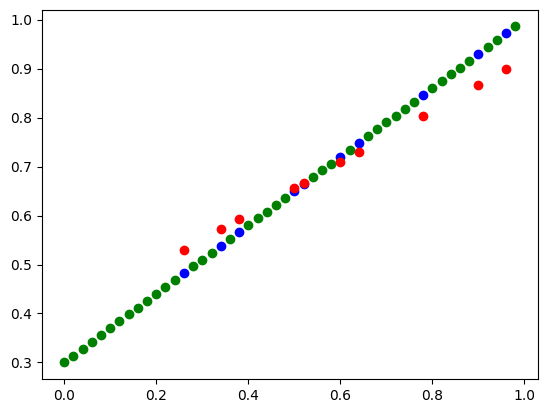

In [18]:
with torch.inference_mode():
  y_pred = model_0(X_test)
  plt.scatter(X_train, y_train, c='g')
  plt.scatter(X_test, y_test, c='b')
  plt.scatter(X_test, y_pred, c='r')
  plt.show()

# **Save and Load model**

1. **torch.save()** - saves model in pickle format
2. **torch.load()** - loads the saved model
3. **torch.nn.Module.state_dict()** - allows model to load saves state dictionary

In [19]:
# Saving and loading an entire model
torch.save(model_0, "/content/PyTorch model")

model = torch.load("/content/PyTorch model", weights_only=False)

print(model.state_dict())

model_0.state_dict()

OrderedDict([('weights', tensor([0.5257])), ('bias', tensor([0.3937]))])


OrderedDict([('weights', tensor([0.5257])), ('bias', tensor([0.3937]))])

In [21]:
# saving and loading only state_dict()

# torch.save(model_0.state_dict(), "/content/PyTorch model /model_0_state_dict.pt")

# loaded_model = LinearRegressionModel()

# loaded_model.load_state_dict(torch.load("/content/PyTorch model /model_0_state_dict.pt"))

In [22]:
# testing loaded model

# y_pred == loaded_model(X_test)

# Putting everything together

In [23]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [24]:
# Turning data into tensor

X = torch.arange(0, 1, 0.04)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.device(device)

weight = 0.56
bias = 5.69

y = [weight * i + bias for i in X]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = torch.tensor(X_train, dtype=torch.float)
y_train = torch.tensor(y_train, dtype=torch.float)
X_test = torch.tensor(X_test, dtype=torch.float)
y_test = torch.tensor(y_test, dtype=torch.float)

# Building model

class LinRegModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  def forward(self, x:torch.tensor) -> torch.tensor:
    return self.weight * x + self.bias

model_1 = LinRegModel()

# Choosing loss and optimizer function

loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.01)

# writing training loop

epoch_count = []
train_loss = []
test_loss = []
epochs = 3000

for i in range(epochs):
  model_1.train()

  y_pred = model_1(X_train)

  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

#writing testing loop

  with torch.inference_mode():
    y_value = model_1(X_test)

  test_loss_value = loss_fn(y_value, y_test)

  if i % 10 == 0:
    print(f'Epoch: {i} | training loss: {loss} | testing loss: {test_loss_value}')
    epoch_count.append(i)
    train_loss.append(loss)
    test_loss.append(test_loss_value)

train_loss = [i.detach().cpu().numpy() for i in train_loss]
test_loss = [i.detach().cpu().numpy() for i in test_loss]


<ipython-input-24-75d41092c068>:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float)
<ipython-input-24-75d41092c068>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype=torch.float)


Epoch: 0 | training loss: 5.371594429016113 | testing loss: 5.372359275817871
Epoch: 10 | training loss: 5.2481689453125 | testing loss: 5.24990177154541
Epoch: 20 | training loss: 5.124743461608887 | testing loss: 5.127443790435791
Epoch: 30 | training loss: 5.001317501068115 | testing loss: 5.004986763000488
Epoch: 40 | training loss: 4.877892017364502 | testing loss: 4.882528781890869
Epoch: 50 | training loss: 4.754466533660889 | testing loss: 4.760071754455566
Epoch: 60 | training loss: 4.631041526794434 | testing loss: 4.637613773345947
Epoch: 70 | training loss: 4.507615089416504 | testing loss: 4.515156269073486
Epoch: 80 | training loss: 4.384189605712891 | testing loss: 4.392698764801025
Epoch: 90 | training loss: 4.260764122009277 | testing loss: 4.270240783691406
Epoch: 100 | training loss: 4.137338161468506 | testing loss: 4.147783279418945
Epoch: 110 | training loss: 4.013913154602051 | testing loss: 4.025325775146484
Epoch: 120 | training loss: 3.8904869556427 | testing 

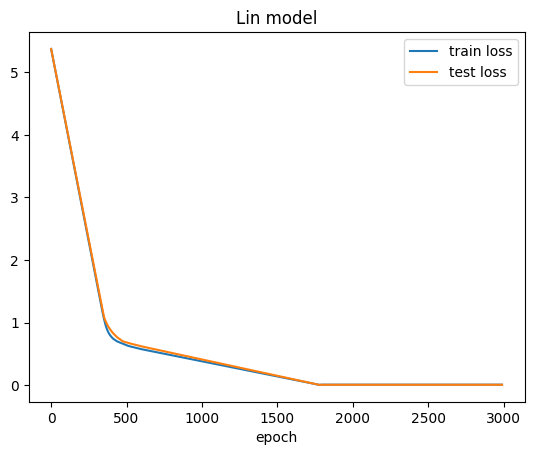

In [25]:
plt.plot(epoch_count, train_loss, label="train loss")
plt.plot(epoch_count, test_loss, label="test loss")
plt.xlabel("epoch")
plt.title("loss")
plt.title("Lin model")
plt.legend()


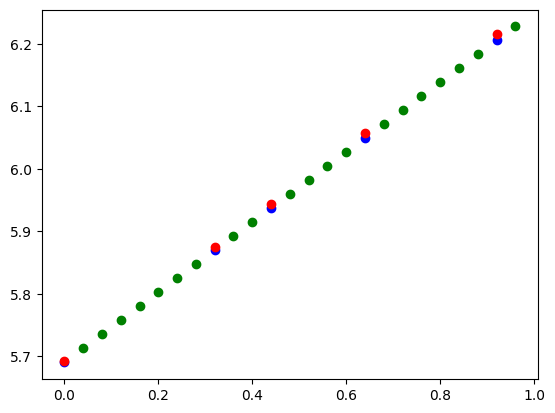

In [26]:
with torch.inference_mode():
  y_pred = model_1(X_test)
  plt.scatter(X_train, y_train, c='g')
  plt.scatter(X_test, y_test, c='b')
  plt.scatter(X_test, y_pred, c='r')
  plt.show()

# **nn.Linear**

In [44]:
class LinearModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

torch.manual_seed(42)
model_2 = LinearModelV1()
model_2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [45]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.Adam(model_2.parameters(), lr=0.01)


In [46]:
X = torch.arange(0, 1, 0.04)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.device(device)

weight = 0.56
bias = 5.69

y = [weight * i + bias for i in X]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = torch.tensor(X_train, dtype=torch.float).unsqueeze(dim=1)
y_train = torch.tensor(y_train, dtype=torch.float).unsqueeze(dim=1)
X_test = torch.tensor(X_test, dtype=torch.float).unsqueeze(dim=1)
y_test = torch.tensor(y_test, dtype=torch.float).unsqueeze(dim=1)

<ipython-input-46-95ccc29b5701>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float).unsqueeze(dim=1)
<ipython-input-46-95ccc29b5701>:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype=torch.float).unsqueeze(dim=1)


In [50]:
for i in range(1000):
  model_2.train()

  y_pred = model_2(X_train)

  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()
  if i % 10 == 0:
    print(f'epoch: {i+1} | loss: {loss}')

epoch: 1 | loss: 0.0007742404704913497
epoch: 11 | loss: 0.0037507296074181795
epoch: 21 | loss: 0.001578640891239047
epoch: 31 | loss: 0.002942895982414484
epoch: 41 | loss: 0.0007717132684774697
epoch: 51 | loss: 0.0037468434311449528
epoch: 61 | loss: 0.0015780925750732422
epoch: 71 | loss: 0.0029376267921179533
epoch: 81 | loss: 0.0007698774570599198
epoch: 91 | loss: 0.0037425041664391756
epoch: 101 | loss: 0.0015755414497107267
epoch: 111 | loss: 0.0029338598251342773
epoch: 121 | loss: 0.0007685184245929122
epoch: 131 | loss: 0.003736734390258789
epoch: 141 | loss: 0.0015736579662188888
epoch: 151 | loss: 0.0029301405884325504
epoch: 161 | loss: 0.0007679462432861328
epoch: 171 | loss: 0.003732991172000766
epoch: 181 | loss: 0.0015712976455688477
epoch: 191 | loss: 0.002926373388618231
epoch: 201 | loss: 0.0007675409433431923
epoch: 211 | loss: 0.0037278414238244295
epoch: 221 | loss: 0.0015702724922448397
epoch: 231 | loss: 0.0029213905800133944
epoch: 241 | loss: 0.00076472759

In [51]:
model_2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.5594]])),
             ('linear_layer.bias', tensor([5.6910]))])